In [1]:
import os
os.chdir('../')

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn.functional as F

import tqdm
tqdm.tqdm.pandas()

In [4]:
from rgnn_at_scale.data import prep_graph, split
from rgnn_at_scale.attacks import create_attack
from rgnn_at_scale.models import GCN
from rgnn_at_scale.train import train
from rgnn_at_scale.helper.utils import accuracy

## Config
**General config:**

In [5]:
datasets = ['cora_ml']#, 'citeseer', 'pubmed', 'ogbn-arxiv']
block_sizes = [1_000_000, 1_000_000, 2_500_000, 10_000_000]
binary_attr = False
attack = 'PRBCD'
seed = 0
device = 0
victim_param_list = [
    {
        'n_filters': 64,
        'dropout': 0.5
    },
    {
        'n_filters': 64,
        'dropout': 0.5
    },
    {
        'n_filters': 64,
        'dropout': 0.5
    },
    {
        'n_filters': [256, 256],
        'dropout': 0.5,
        'with_batchnorm': True,
    }
]
train_params = {
    'lr': 1e-2,
    'weight_decay': 0,
    'patience': 300,
    'max_epochs': 3000
}
attack_params = {
    'keep_heuristic': 'WeightOnly',
    'loss_type': 'tanhMargin',
    'fine_tune_epochs': 0,
    'with_early_stropping': False
}
epsilons = [0.001, 0.01, 0.1]
display_steps = 9999

y_kde_max = 7.5

make_undirected_options = [True, False]
loss_types = ['CE', 'CW', 'tanhMargin']

torch.manual_seed(seed)
np.random.seed(seed)

**Config for plotting:**

In [6]:
bins = 6

assert bins % 2 == 0, 'Only an even number of bins supported'

x_0 = 4
x_1 = 2
x_2 = 0

bar_width = 0.8

neg_colormap = plt.get_cmap('Oranges')
pos_colormap = plt.get_cmap('Blues')

colors = (
    [neg_colormap((bins / 2 - i) / bins) for i in range(bins // 2)]
    + [pos_colormap((bins / 2 - i) / bins) for i in reversed(range(bins // 2))]
)

fig_width = 0.35
fig_ratio_yx = 0.6

## Attack and Generate Plots

cora_ml 1000000 {'n_filters': 64, 'dropout': 0.5} False


Training...:   0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 2/400 [00:00<00:22, 17.50it/s]

Clean accuracy: 0.64861661195755
cora_ml False 0.001 CE

Before the attack - Loss: 1.0757850408554077 Accuracy: 64.862 %


Epoch: 0 Loss: 1.0757807493209839 Accuracy: 64.664 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.6482213139533997
cora_ml False 0.001 CW

Before the attack - Loss: -2.0415761470794678 Accuracy: 64.862 %



  1%|          | 4/400 [00:00<00:21, 18.46it/s]


Epoch: 0 Loss: -2.041541337966919 Accuracy: 64.901 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.6458497643470764
cora_ml False 0.001 tanhMargin

Before the attack - Loss: -0.29617342352867126 Accuracy: 64.862 %



  1%|          | 4/400 [00:00<00:23, 17.05it/s]


Epoch: 0 Loss: -0.2961744964122772 Accuracy: 64.190 %



100%|██████████| 400/400 [00:21<00:00, 18.48it/s]


Perturbed accuracy: 0.6454545259475708


  0%|          | 2/400 [00:00<00:20, 19.74it/s]

cora_ml False 0.01 CE

Before the attack - Loss: 1.0757850408554077 Accuracy: 64.862 %


Epoch: 0 Loss: 1.0757807493209839 Accuracy: 63.162 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.6474308371543884
cora_ml False 0.01 CW

Before the attack - Loss: -2.0415761470794678 Accuracy: 64.862 %



  1%|          | 4/400 [00:00<00:21, 18.52it/s]


Epoch: 0 Loss: -2.041541337966919 Accuracy: 63.874 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.6276679635047913
cora_ml False 0.01 tanhMargin

Before the attack - Loss: -0.29617342352867126 Accuracy: 64.862 %



  1%|          | 4/400 [00:00<00:21, 18.33it/s]


Epoch: 0 Loss: -0.2961744964122772 Accuracy: 60.672 %



100%|██████████| 400/400 [00:21<00:00, 18.25it/s]


Perturbed accuracy: 0.6209486126899719
cora_ml False 0.1 CE


  0%|          | 2/400 [00:00<00:21, 18.43it/s]


Before the attack - Loss: 1.0757850408554077 Accuracy: 64.862 %


Epoch: 0 Loss: 1.0757807493209839 Accuracy: 56.680 %



100%|██████████| 400/400 [00:22<00:00, 18.16it/s]
<ipython-input-7-667aac02fb00>:147: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.6312252879142761
cora_ml False 0.1 CW

Before the attack - Loss: -2.0415761470794678 Accuracy: 64.862 %



  1%|          | 4/400 [00:00<00:22, 17.64it/s]


Epoch: 0 Loss: -2.041541337966919 Accuracy: 59.960 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.5256916880607605
cora_ml False 0.1 tanhMargin

Before the attack - Loss: -0.29617342352867126 Accuracy: 64.862 %



  1%|          | 4/400 [00:00<00:21, 18.33it/s]


Epoch: 0 Loss: -0.2961744964122772 Accuracy: 51.621 %



100%|██████████| 400/400 [00:21<00:00, 18.18it/s]


Perturbed accuracy: 0.469169944524765
cora_ml 1000000 {'n_filters': 64, 'dropout': 0.5, 'row_norm': True} True


Training...:   0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 1/400 [00:00<00:43,  9.23it/s]

Clean accuracy: 0.7940711379051208
cora_ml True 0.001 CE

Before the attack - Loss: 0.7091850638389587 Accuracy: 79.407 %


Epoch: 0 Loss: 0.7091749310493469 Accuracy: 78.893 %



100%|██████████| 400/400 [00:43<00:00,  9.18it/s]


Perturbed accuracy: 0.791304349899292


  0%|          | 1/400 [00:00<00:43,  9.23it/s]

cora_ml True 0.001 CW

Before the attack - Loss: -4.36478328704834 Accuracy: 79.407 %


Epoch: 0 Loss: -4.364708423614502 Accuracy: 79.407 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.7916995882987976
cora_ml True 0.001 tanhMargin

Before the attack - Loss: -0.5868443846702576 Accuracy: 79.407 %



  0%|          | 2/400 [00:00<00:43,  9.20it/s]


Epoch: 0 Loss: -0.5868448615074158 Accuracy: 78.379 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.7865612506866455
cora_ml True 0.01 CE

Before the attack - Loss: 0.7091850638389587 Accuracy: 79.407 %



  0%|          | 2/400 [00:00<00:42,  9.30it/s]


Epoch: 0 Loss: 0.7091752290725708 Accuracy: 76.759 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.7699604630470276
cora_ml True 0.01 CW

Before the attack - Loss: -4.36478328704834 Accuracy: 79.407 %



  0%|          | 2/400 [00:00<00:43,  9.23it/s]


Epoch: 0 Loss: -4.364709377288818 Accuracy: 78.775 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.7584980130195618
cora_ml True 0.01 tanhMargin

Before the attack - Loss: -0.5868443846702576 Accuracy: 79.407 %



  0%|          | 2/400 [00:00<00:43,  9.20it/s]


Epoch: 0 Loss: -0.5868449211120605 Accuracy: 75.652 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.7387351393699646
cora_ml True 0.1 CE

Before the attack - Loss: 0.7091850638389587 Accuracy: 79.407 %



  0%|          | 2/400 [00:00<00:43,  9.25it/s]


Epoch: 0 Loss: 0.7091752290725708 Accuracy: 71.462 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.6739130020141602
cora_ml True 0.1 CW

Before the attack - Loss: -4.36478328704834 Accuracy: 79.407 %



  0%|          | 2/400 [00:00<00:43,  9.08it/s]


Epoch: 0 Loss: -4.364709854125977 Accuracy: 66.087 %



  0%|          | 0/400 [00:00<?, ?it/s]

Perturbed accuracy: 0.6604743003845215
cora_ml True 0.1 tanhMargin

Before the attack - Loss: -0.5868443846702576 Accuracy: 79.407 %



  0%|          | 2/400 [00:00<00:43,  9.20it/s]


Epoch: 0 Loss: -0.5868448615074158 Accuracy: 70.791 %



100%|██████████| 400/400 [00:44<00:00,  9.09it/s]


Perturbed accuracy: 0.5865612626075745


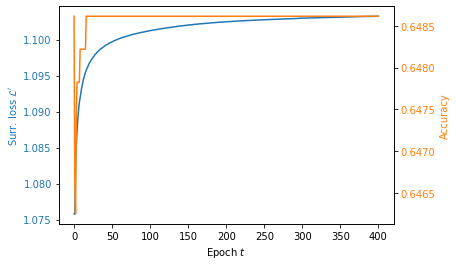

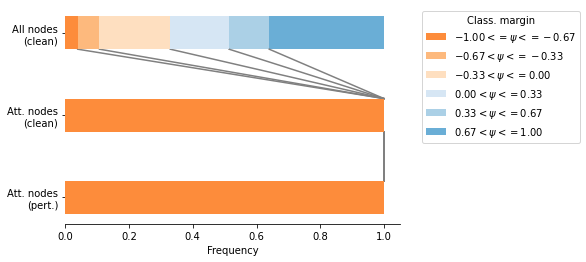

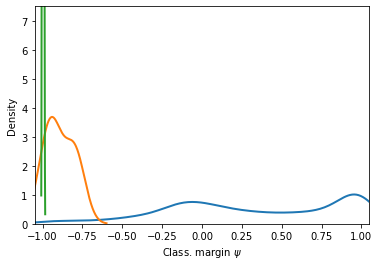

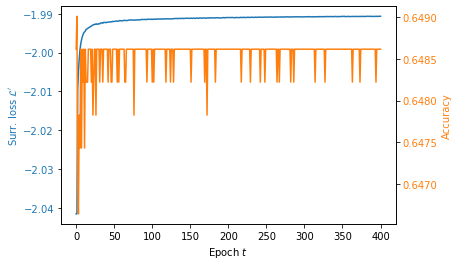

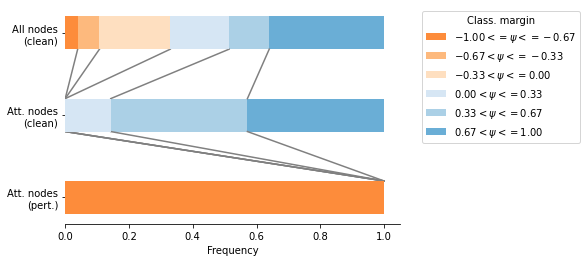

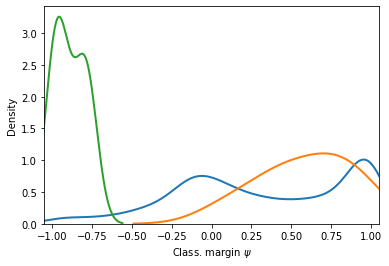

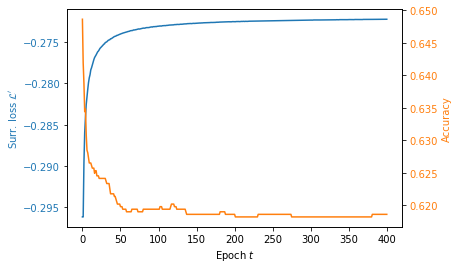

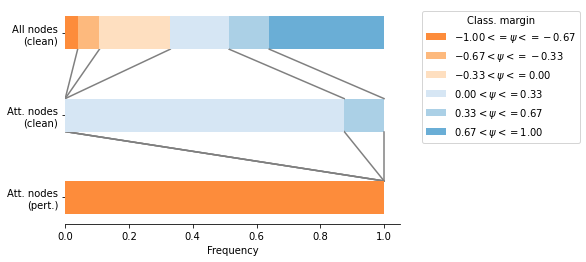

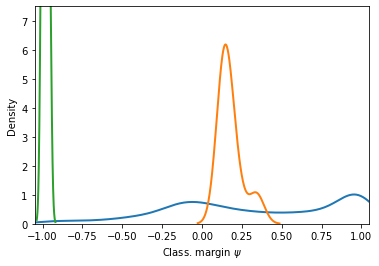

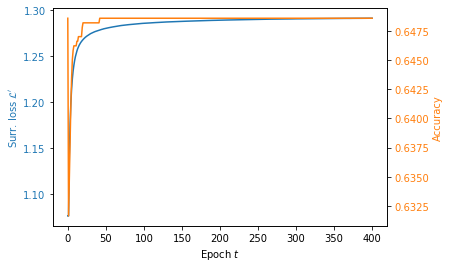

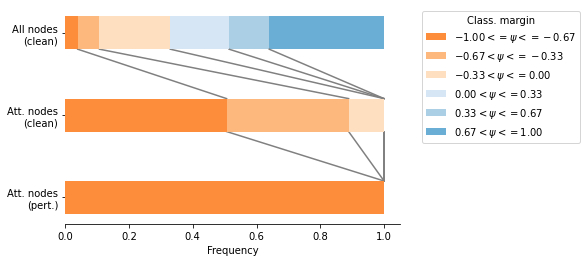

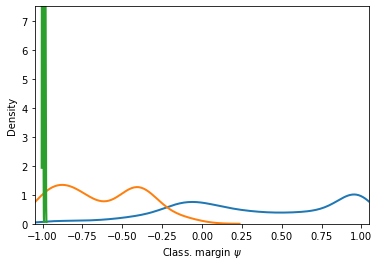

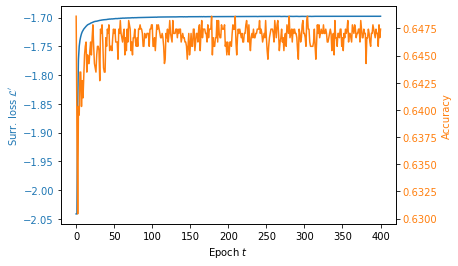

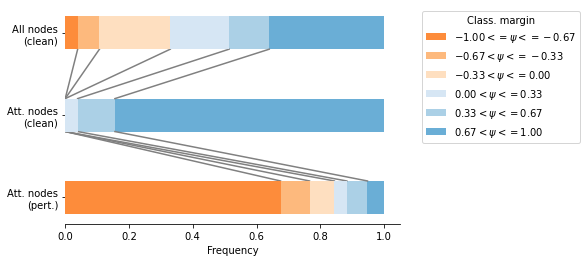

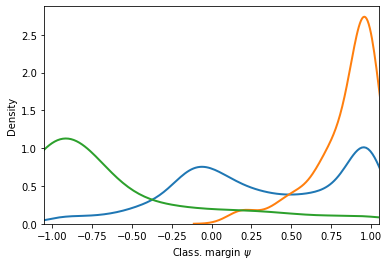

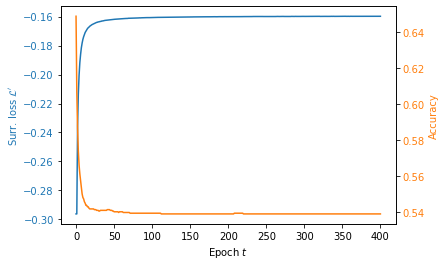

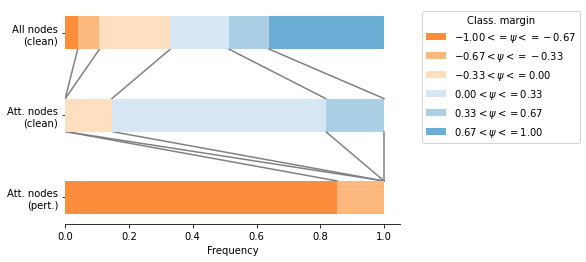

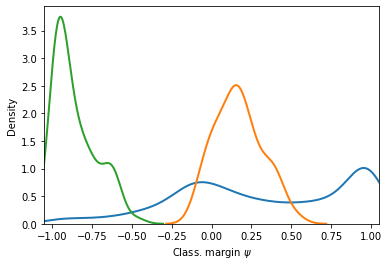

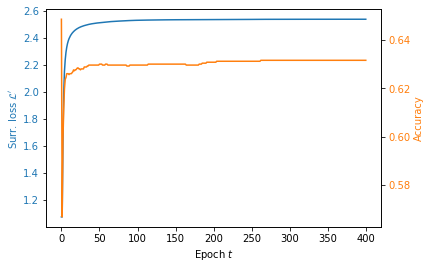

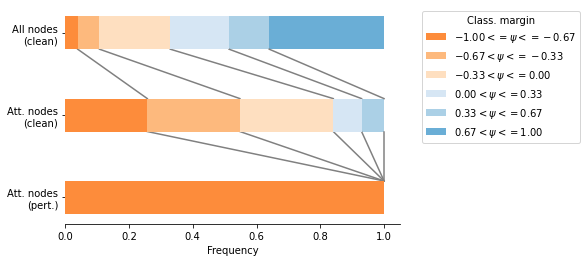

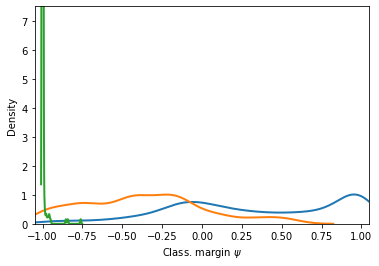

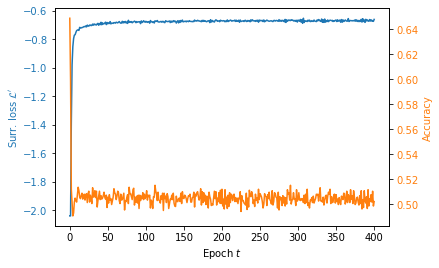

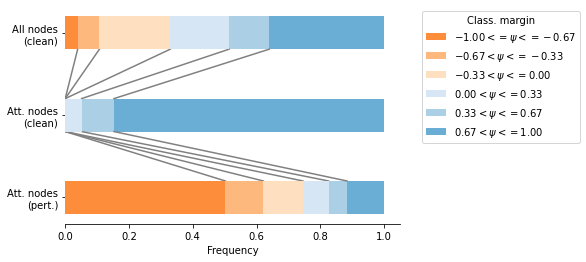

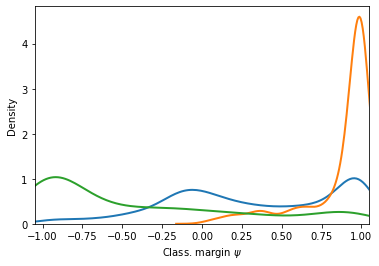

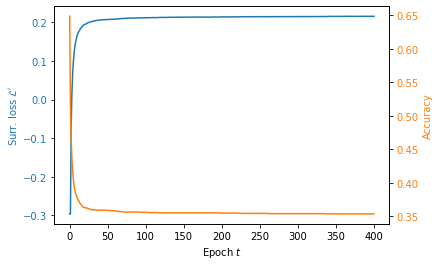

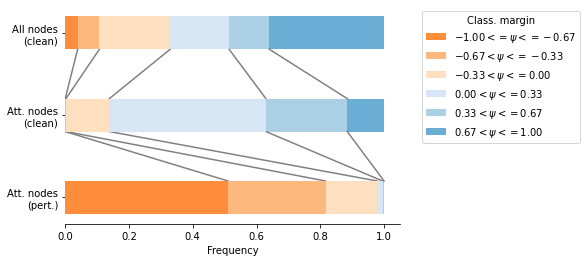

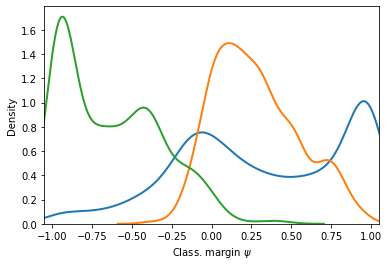

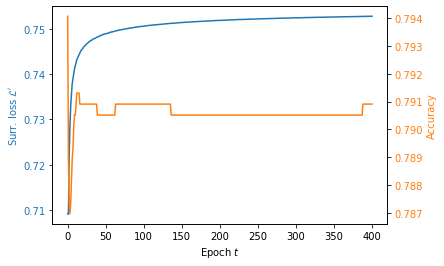

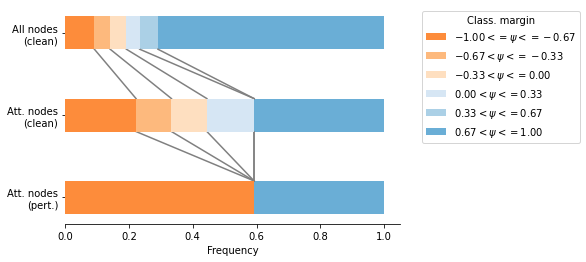

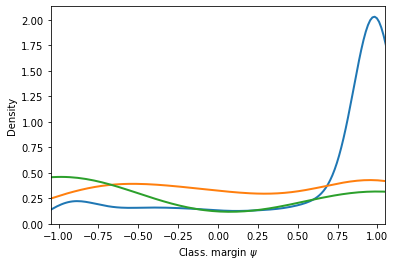

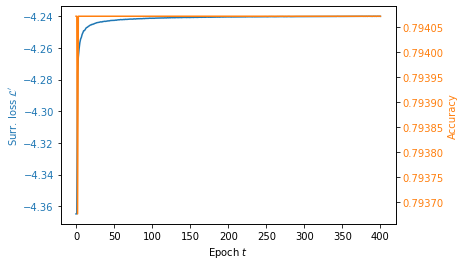

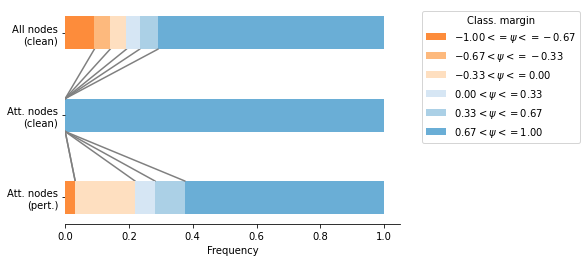

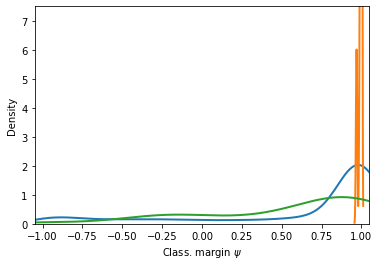

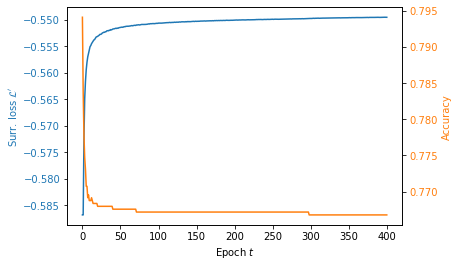

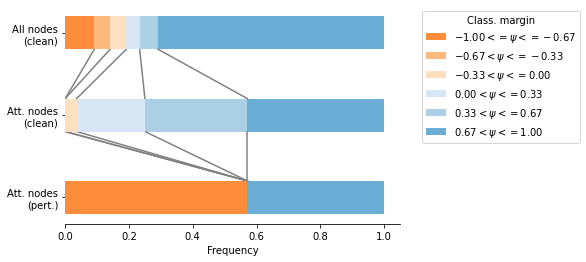

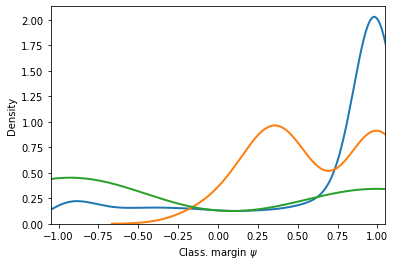

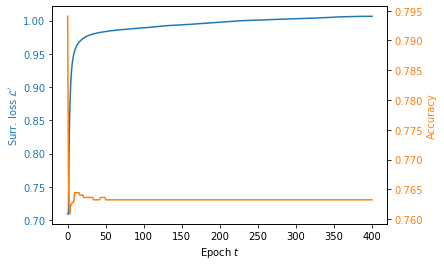

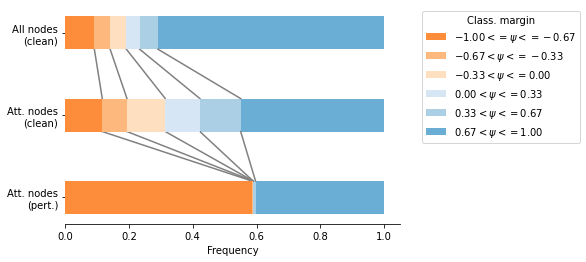

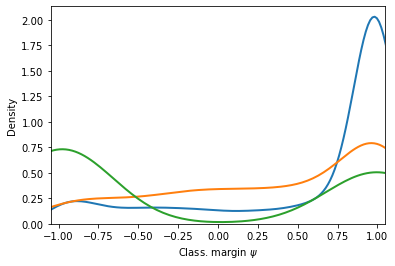

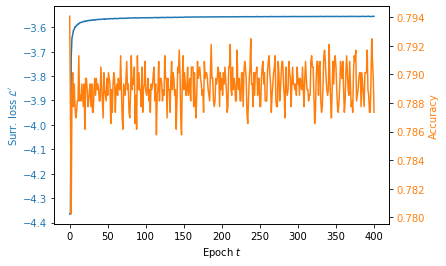

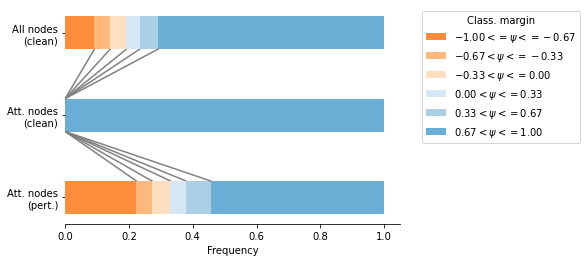

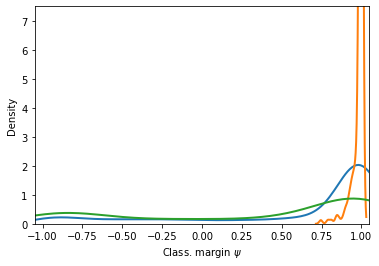

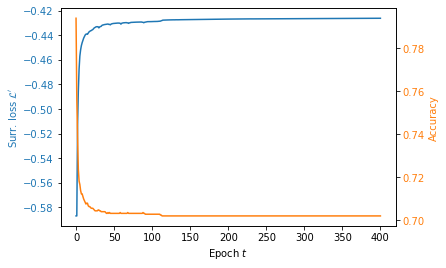

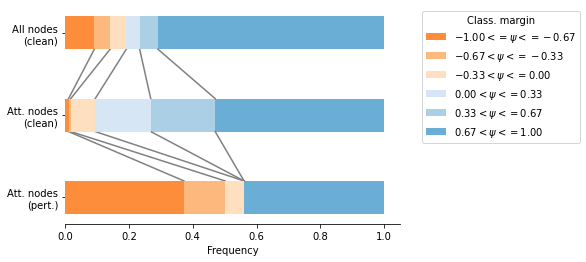

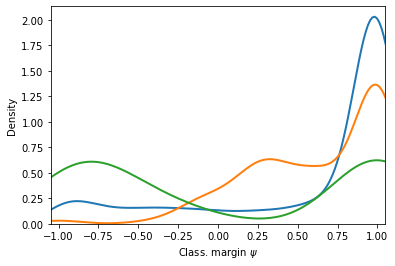

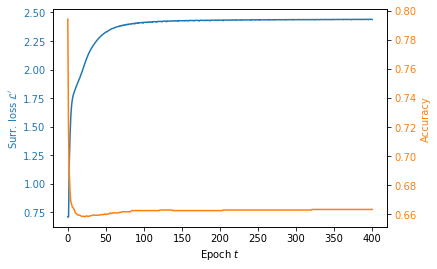

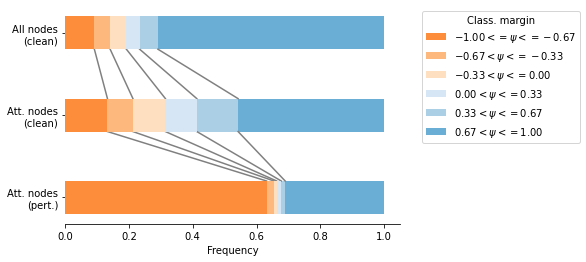

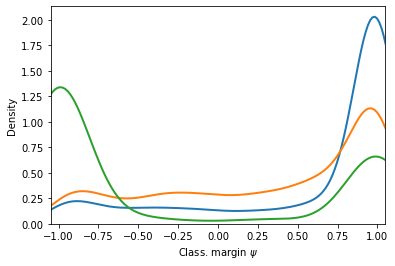

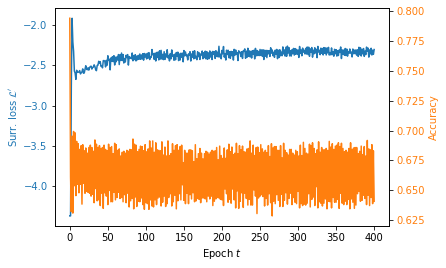

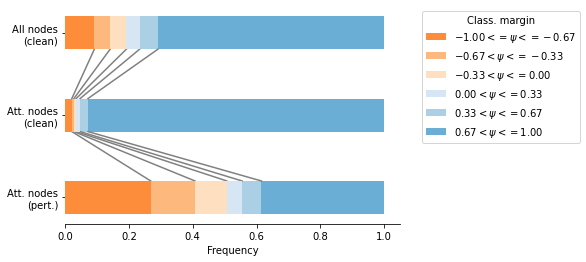

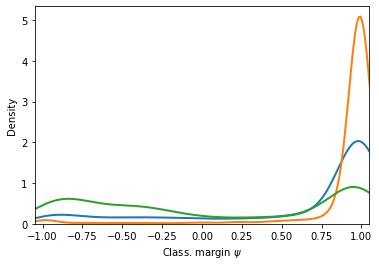

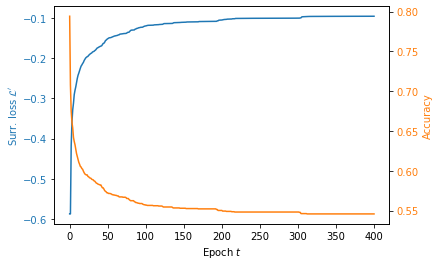

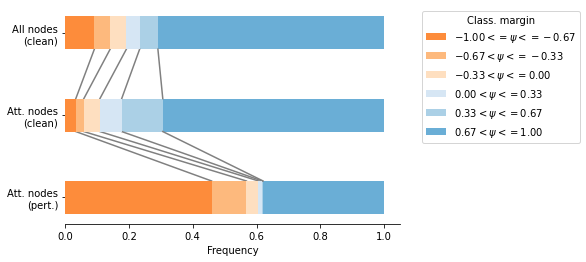

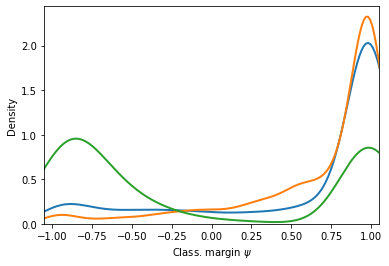

In [7]:
for dataset, block_size, victim_params in zip(datasets, block_sizes, victim_param_list):
    for make_undirected in [False, True]:
        print(dataset, block_size, victim_params, make_undirected)

        graph = prep_graph(dataset, device='cpu', binary_attr=binary_attr, make_undirected=make_undirected,
                           return_original_split=dataset.startswith('ogbn'))
        
        attr, adj, labels = graph[:3]
        if graph[3] is None:
            idx_train, idx_val, idx_test = split(labels.cpu().numpy())
        else:
            idx_train, idx_val, idx_test = graph[3]['train'], graph[3]['valid'], graph[3]['test']
            
        n_features = attr.shape[1]
        n_classes = int(labels.max() + 1)

        victim_params_current = dict(victim_params)
        if make_undirected == False:
            victim_params['row_norm'] = True
            victim_params_current['n_filters'] = []

        gcn = GCN(n_classes=n_classes, n_features=n_features, **victim_params_current).to(device)
        train(model=gcn, attr=attr.to(device), adj=adj.to(device), labels=labels.to(device),
              idx_train=idx_train, idx_val=idx_val, display_step=display_steps, **train_params)

        gcn.eval()

        with torch.no_grad():
            clean_logits = gcn(attr.to(device), adj.to(device))
        accuracy(clean_logits, labels.to(device), idx_test)
        print(f'Clean accuracy: {accuracy(clean_logits, labels.to(device), idx_test)}')

        for epsilon in epsilons:
            for loss_type in loss_types:
                print(dataset, make_undirected, epsilon, loss_type)
                
                temp_attack_params = dict(attack_params)
                temp_attack_params['loss_type'] = loss_type
                temp_attack_params['epsilon'] = epsilon
                temp_attack_params['block_size'] = block_size
                
                adversary = create_attack(attack, adj=adj, attr=attr, binary_attr=False, labels=labels, 
                                          make_undirected=make_undirected, model=gcn, idx_attack=idx_test, 
                                          device=device, data_device=device, display_step=display_steps, 
                                          **temp_attack_params)

                m = adj.nnz()
                torch.manual_seed(seed)
                np.random.seed(seed)

                n_perturbations = int(round(epsilon * m))
                adversary.attack(n_perturbations)
                
                ############## Attack Loss ###############
                
                fig, ax = plt.subplots()

                color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
                ax.set_xlabel('Epoch $t$')
                ax.set_ylabel(r"Surr. loss $\mathcal{L}'$", color=color)
                ax.plot(adversary.attack_statistics['loss'], color=color)
                ax.tick_params(axis='y', labelcolor=color)

                ax = ax.twinx()

                color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
                ax.set_ylabel('Accuracy', color=color)
                ax.plot(adversary.attack_statistics['accuracy'], color=color)
                ax.tick_params(axis='y', labelcolor=color)
                
                plt.gcf().show()
                
                ############################################

                if make_undirected:
                    attcked_edges = adversary.modified_edge_index[
                        :, adversary.modified_edge_weight_diff.round().bool()
                    ].flatten()
                else:
                    attcked_edges = adversary.modified_edge_index[
                        0, adversary.modified_edge_weight_diff.round().bool()
                    ].flatten()
                attcked_edges = attcked_edges[np.isin(attcked_edges.cpu().numpy(), idx_test)]

                with torch.no_grad():
                    attacked_logits = gcn(attr.to(device), adversary.adj_adversary.to(device))
                print(f'Perturbed accuracy: {accuracy(attacked_logits, labels.to(device), idx_test)}')

                sorted_attacked = attacked_logits.argsort(-1).cpu()
                best_non_target_class_attacked = sorted_attacked[sorted_attacked != labels[:, None]].reshape(attacked_logits.size(0), -1)[:, -1]
                margin_attacked = (
                    F.softmax(attacked_logits, dim=-1)[np.arange(attacked_logits.size(0)), labels.long()]
                    - F.softmax(attacked_logits, dim=-1)[np.arange(attacked_logits.size(0)), best_non_target_class_attacked.long()]
                )

                sorted_clean = clean_logits.argsort(-1).cpu()
                best_non_target_class = sorted_clean[sorted_clean != labels[:, None]].reshape(clean_logits.size(0), -1)[:, -1]
                margin = (
                    F.softmax(clean_logits, dim=-1)[np.arange(clean_logits.size(0)), labels.long()]
                    - F.softmax(clean_logits, dim=-1)[np.arange(clean_logits.size(0)), best_non_target_class.long()]
                )

                freq_all_clean, borders = np.histogram(margin.cpu(), bins=bins, range=(-1,1), density=True)
                freq_attacked_clean, _ = np.histogram(margin[attcked_edges].cpu(), bins=bins, range=(-1,1), density=True)
                freq_attacked_pert, _ = np.histogram(margin_attacked[attcked_edges].cpu(), bins=bins, range=(-1,1), density=True)

                freq_all_clean = 2 / bins * np.cumsum(freq_all_clean)
                freq_attacked_clean = 2 / bins * np.cumsum(freq_attacked_clean)
                freq_attacked_pert = 2 / bins * np.cumsum(freq_attacked_pert)

                ############## Bar Plot ###############
                
                fig, ax = plt.subplots()

                for i, (el_0, el_1, el_2, color) in enumerate(zip(freq_all_clean, freq_attacked_clean, freq_attacked_pert, colors)):
                    if i != 0:
                        sep = '<'
                    else:
                        sep = '<='
                    plt.barh([x_0, x_1, x_2],
                             (el_0, el_1, el_2), 
                             bar_width,
                             color=color,
                             zorder=bins - i,
                             label=f'${borders[i]:.2f} {sep} \psi <= {borders[i + 1]:.2f}$')
                    if i < bins-1:
                        plt.plot((el_0, el_1), [x_0 - bar_width / 2, x_1 + bar_width / 2], color='grey', label='_nolegend_')
                        plt.plot((el_1, el_2), [x_1 - bar_width / 2, x_2 + bar_width / 2], color='grey', label='_nolegend_')

                plt.yticks([x_0, x_1, x_2], ['All nodes\n(clean)', 'Att. nodes\n(clean)', 'Att. nodes\n(pert.)'])

                plt.grid(False)

                ax.spines['right'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.spines['top'].set_visible(False)

                plt.xlabel('Frequency')
                plt.legend(bbox_to_anchor=(1.05, 1), title=r'Class. margin', loc='upper left')

                plt.gcf().show()
                
                ############################################
                
                ############## KDE Plot ###############
                
                fig, ax = plt.subplots()

                kde1 = sns.kdeplot(margin.cpu().numpy(), ax=ax, label='Test nodes (clean)', linewidth=2)
                kde2 = sns.kdeplot(margin[attcked_edges].cpu().numpy(), ax=ax, label='Att. nodes (clean)', linewidth=2)
                kde3 = sns.kdeplot(margin_attacked[attcked_edges].cpu().numpy(), ax=ax, label='Att. nodes (pert.)', linewidth=2) #, 
                                   #color=kde2.lines[-1].get_color(), linestyle='--') # FOR CAMERA READY


                plt.xlim(-1.05, 1.05)
                plt.xlabel('Class. margin $\psi$')
                
                if ax.get_ylim()[1] > y_kde_max:
                    ax.set_ylim(0, y_kde_max)
                
                ############################################